<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/project_logo.jpg?raw=true width='800' />
</div>

今天分享一期关于【缺失值可视化诊断】的包==> missingno。

大家好，我是知识渊博、爱好小酌、嗓音独特，还挺幽默的鲸鲸！

今天继续分享【Data Preparation】的重要环节：缺失值处理。

那么在诊断数据缺失值时，一定要搞清楚为什么会存在缺失值，这将极大影响我们接下来如何处理缺失值！

先介绍一下「缺失类型」

1. MCAR (Missing completely at Random)
2. MAR (Missing at Random)
3. MNAR (Missing not at Random)

MCAR 的意思是“缺失与任何值之间没有关系”。因此，在这种情况下，可以删除缺失值。为此，可以删除列缺失值；最小化丢失数据或删除行缺失值。

MAR 的意思是“缺失与其他观察到的数据之间存在系统关系，但与缺失数据无关”。

最后，MNAR 的意思是“缺失与它的值之间存在关系，缺失或非缺失”。

---


那么如何判断以上的情况呢？我强烈建议大家使用Python的【missingno】包。


今天为大家就介绍一下这个包的安装和基本使用！

👉安装：打开你的Anaconda Prompt，输入`pip install missingno`即可。

👉引入：`import missingno as msno`


（点击下面跳转）

1.  [读取数据](#读取数据)
2.  [缺失矩阵（matrix）](#缺失矩阵（matrix）)
3.  [缺失柱形图（bar）](#缺失柱形图（bar）)
3.  [缺失热力图（heatmap）](#缺失热力图（heatmap）)
4.  [缺失树状图（dendrogram）](#缺失树状图（dendrogram）)

# 读取数据

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv'
collisions = pd.read_csv(url)

In [2]:
collisions.head().append(collisions.tail())

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,"(40.6625139, -73.8720068)",WORTMAN AVENUE,MONTAUK AVENUE,NaN,...,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN
1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,"(40.7213228, -74.0083444)",HUBERT STREET,HUDSON STREET,NaN,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
2,04/16/2016,09:15:00,BROOKLYN,11201.0,40.687999,-73.997563,"(40.6879989, -73.9975625)",HENRY STREET,WARREN STREET,NaN,...,Lost Consciousness,Lost Consciousness,NaN,NaN,NaN,PASSENGER VEHICLE,VAN,NaN,NaN,NaN
3,04/15/2016,10:20:00,QUEENS,11375.0,40.719228,-73.854542,"(40.7192276, -73.8545422)",NaN,NaN,67-64 FLEET STREET,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
4,04/15/2016,10:35:00,BROOKLYN,11210.0,40.632147,-73.952731,"(40.6321467, -73.9527315)",BEDFORD AVENUE,CAMPUS ROAD,NaN,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
7298,01/07/2016,21:30:00,BROOKLYN,11235.0,40.584305,-73.959113,"(40.5843046, -73.9591125)",EAST 11 STREET,BLAKE COURT,NaN,...,Lost Consciousness,Unspecified,NaN,NaN,NaN,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
7299,01/06/2016,12:50:00,BROOKLYN,11220.0,40.638583,-74.020772,"(40.6385828, -74.0207721)",4 AVENUE,64 STREET,NaN,...,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
7300,01/04/2016,17:45:00,BROOKLYN,11235.0,40.581744,-73.953836,"(40.5817444, -73.9538363)",SHORE BOULEVARD,CASS PLACE,NaN,...,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
7301,01/02/2016,17:20:00,MANHATTAN,10016.0,40.750960,-73.982723,"(40.7509597, -73.9827227)",WEST 38 STREET,5 AVENUE,NaN,...,Lost Consciousness,Lost Consciousness,NaN,NaN,NaN,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
7302,01/02/2016,20:00:00,BROOKLYN,11213.0,40.663604,-73.934391,"(40.6636039, -73.9343912)",SCHENECTADY AVENUE,EMPIRE BOULEVARD,NaN,...,Lost Consciousness,Unspecified,NaN,NaN,NaN,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


传统上，我们会用`.isnull().sum()`的形式去了解数据的缺失值情况，但是缺点是不够直观和美观，也不能了解缺失值在数据中具体的分布，以及列与列之间的缺失值分布是否有联系。

那么，missingno帮我们解决了这个问题。

In [3]:
round(collisions.isnull().sum()/collisions.shape[0],2)

DATE                             0.00
TIME                             0.00
BOROUGH                          0.05
ZIP CODE                         0.05
LATITUDE                         0.00
LONGITUDE                        0.00
LOCATION                         0.00
ON STREET NAME                   0.15
CROSS STREET NAME                0.16
OFF STREET NAME                  0.90
NUMBER OF PERSONS INJURED        0.00
NUMBER OF PERSONS KILLED         0.00
NUMBER OF PEDESTRIANS INJURED    0.00
NUMBER OF PEDESTRIANS KILLED     0.00
NUMBER OF CYCLISTS INJURED       1.00
NUMBER OF CYCLISTS KILLED        1.00
CONTRIBUTING FACTOR VEHICLE 1    0.00
CONTRIBUTING FACTOR VEHICLE 2    0.15
CONTRIBUTING FACTOR VEHICLE 3    0.96
CONTRIBUTING FACTOR VEHICLE 4    0.99
CONTRIBUTING FACTOR VEHICLE 5    1.00
VEHICLE TYPE CODE 1              0.01
VEHICLE TYPE CODE 2              0.21
VEHICLE TYPE CODE 3              0.96
VEHICLE TYPE CODE 4              0.99
VEHICLE TYPE CODE 5              1.00
dtype: float

# 缺失矩阵（matrix）

缺失矩阵是通过密集显示数据（黑色是正常数据，白色为缺失部分）可快速直观地挑选出数据的缺失值，明确缺失值的分布情况（frequency distribution）。

在这里，明显看出白色较多表示缺失值数量较大，右侧表示了缺失值的频数分布，比如集中出现在哪里，变量之间缺失值的出现位置是否相关。

<AxesSubplot:>

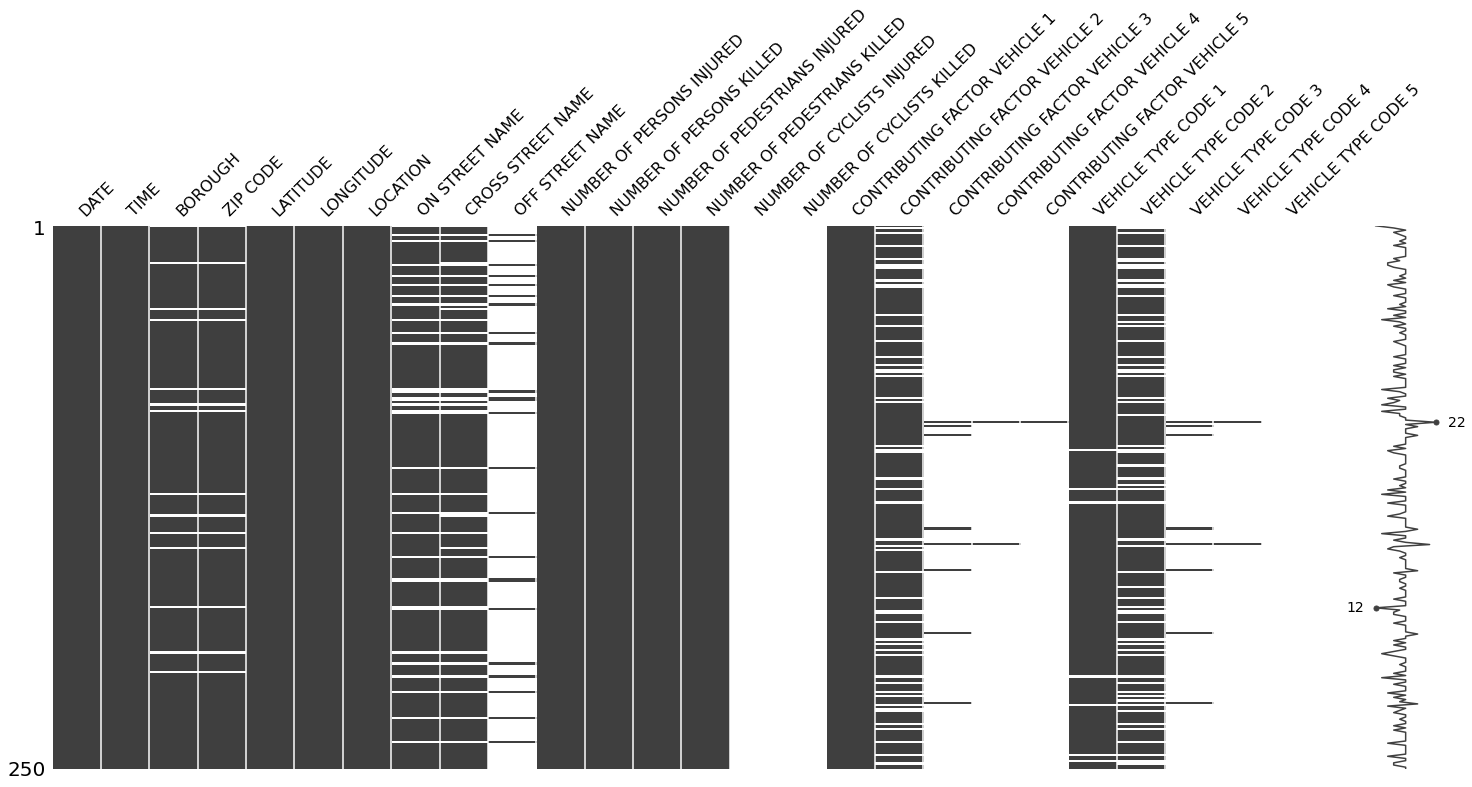

In [4]:
import missingno as msno
%matplotlib inline
msno.matrix(collisions.sample(250))

# 缺失柱形图（bar）

缺失柱形图是通过一个更简单易懂的方式向我们展示每一列的缺失值具体数值以及百分比，传统上我们是用图3的方法来计算的，不够美观也不够直观。

<AxesSubplot:>

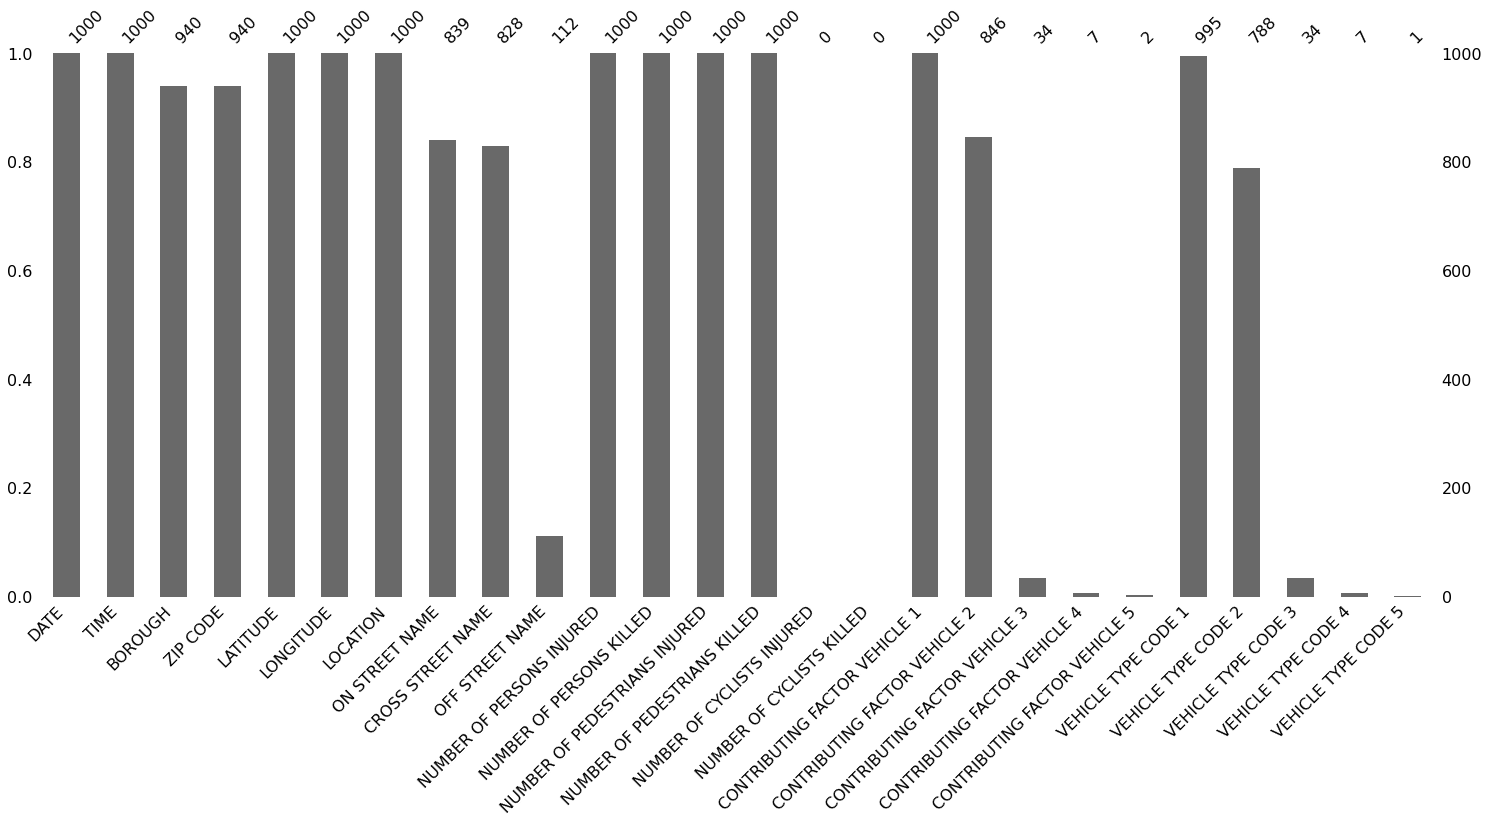

In [5]:
msno.bar(collisions.sample(1000))

# 缺失热力图（heatmap）

缺失热力图经常绘制协方差矩阵来描述变量直接的相关系数，从而判断每对变量的相关性，那么我们是否能映射到【缺失值】的相关性上，`msno.heatmap`就帮助我们实现了这个想法，其表现了一个变量的存在与否（缺失情况）对另一个变量的存在（缺失情况）有多大影响！

似乎使用OFF STREET NAME 提交的报告不太可能具有完整的地理数据（-0.8表示OFF STREET NAME的存在反而导致对应的两个变量缺失）。

<AxesSubplot:>

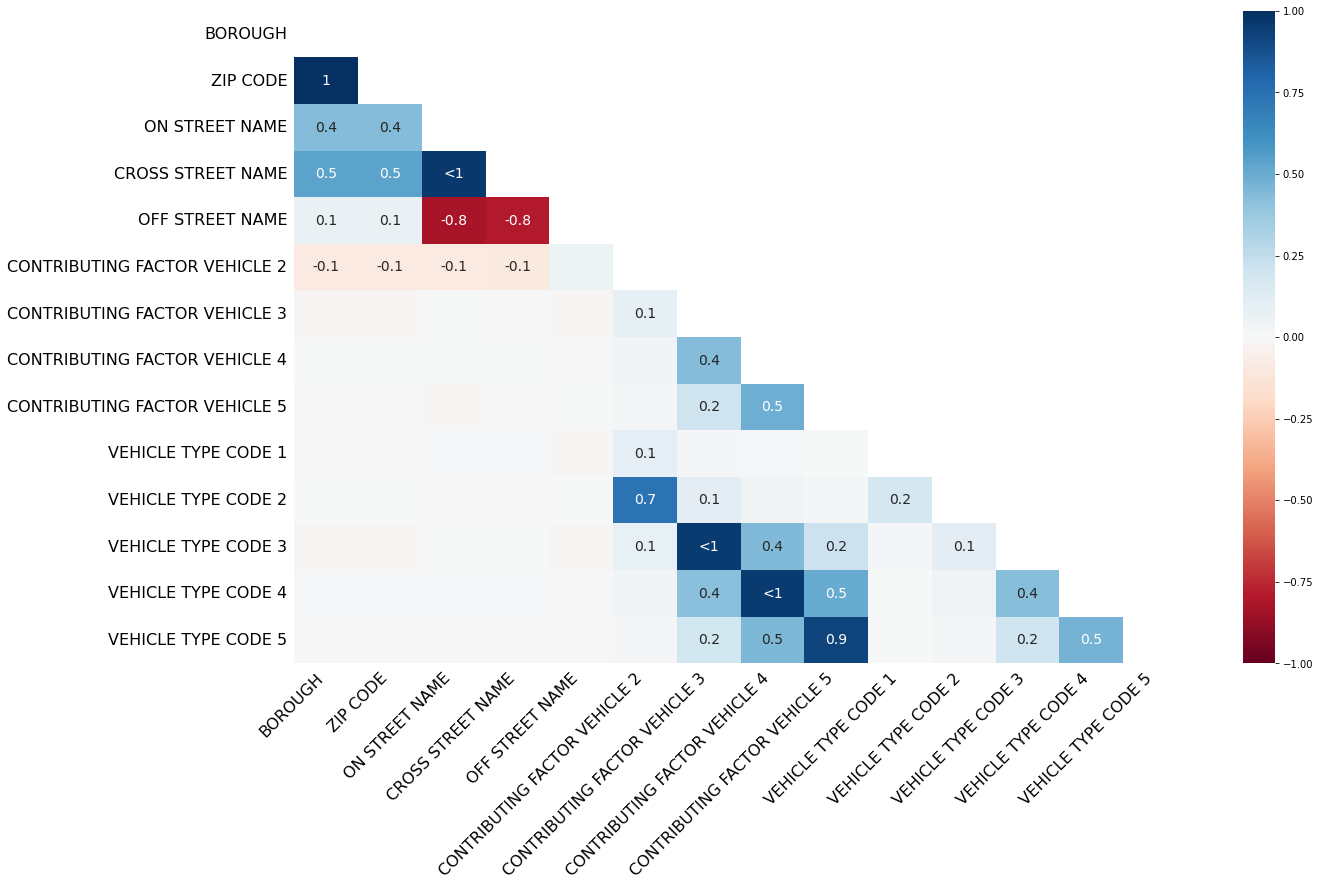

In [6]:
msno.heatmap(collisions)
# how strongly the presence or absence of one variable affects the presence of another

# 缺失树状图（dendrogram）

缺失树状图更全面地关联变量，比相关热图中可见的成对趋势会更深层次！大家如果了解【层次聚类 hierarchical clustering】，应该对这个图不陌生，我们先把每个变量当成一个簇，然后计算两两之间的【相似度】，然后和并形成一个新簇，再继续迭代直到最后形成一个簇，像是倒过来的树形图。那么这里【相似度】我们就理解为【缺失值相关度】。



<AxesSubplot:>

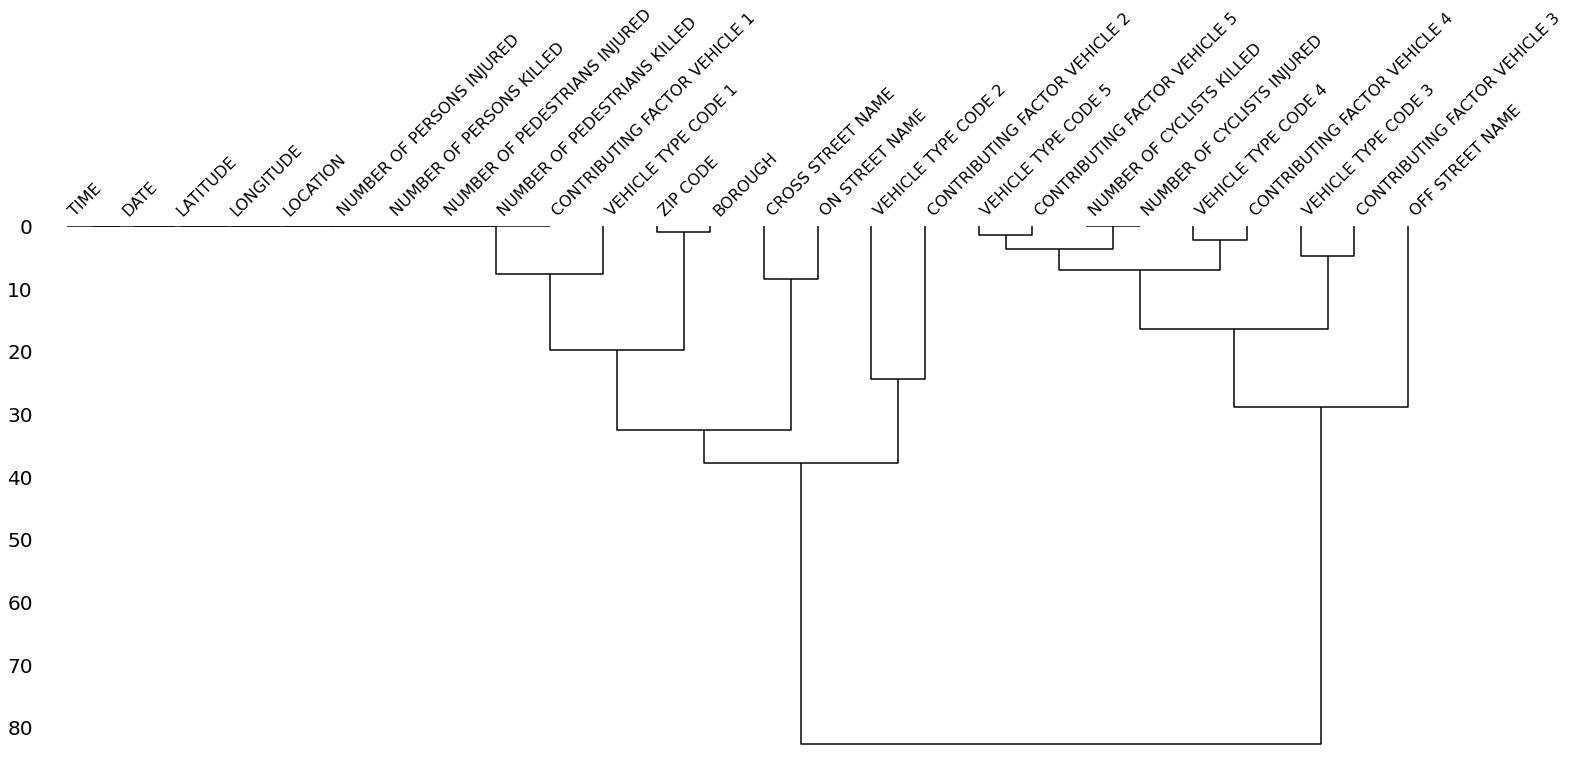

In [7]:
msno.dendrogram(collisions)